### Technical Take Home


This is the technical take home for Nile.com, an online shopping site. Not to be confused with a river in South America that it totally isn’t.



#### Question 1: SQL

Our PostGRES database has 3 tables: transactions, products, and customers. They have the following schemas:




|Trans. Column      | Data type |    | Prods. Column     | Data type |    | Custs. Column | Data type  |
|-------------------|-----------|    |-------------------|-----------|    |---------------|------------|
|   customer_id     | int       |    |   product_id      | int       |    | customer_id   | int        |
|   transact_at     | timestamp |    |   add_at          | timestamp |    | joined_at     | timestamp  |
|   transact_amt    | real      |    |   product_cost    | real      |    | last_login_at | timestamp  |
|   transact_id     | int       |    |   product_name    | varchar   |    | state         | varchar    |
|   product_id      | real      |    |   product_category| varchar   |    | is_deactivated| bool       |
|   payment_type    | varchar   |    |                   |           |    | name          | varchar    |
|   payment_success | bool      |    |                   |           |    | e-mail        | varchar    |



 Write queries, valid for postgres 9.3, to generate the following results:


a. Return the name and purchase amount of the five customers in each state who have spent the most on our site.
b. The name most popular item in every state and the state.
c. The five most popular items for users with a ‘gmail’ email in the past 30 days, based on number of sales.

https://github.com/spaceport729/thinkful/blob/master/SQL_tech_take_home.docx

#### Question 2: Experimentation

Answer each question with no more than 250 words.


a. We’re launching a redesigned home page for our site, and want to study how it affects visitors. What are some of the key things you’d want to study? What metrics would you measure? Provide an explanation for every metric.

As an online shopping site, the primary goal of redesigning the home page is to increase sales. As such, my key metric would be the conversion rate, which in this case would be the percentage of visitors who purchase an item on the site. I'd also want to measure session duration, page views, bounce rate and exit pages. These secondary metrics could provide insight into how the user is interacting with the site. Each could indicate a problem or improvement. Longer sessions and more page views could indicate more interest in the content or a better aesthetic. But, they could also indicate that users are having trouble navigating the site. Bounce rate measures how often a user goes to a site and immediately leaves it and exit pages track the page that users leave the site before purchase. Both could be indicative of a specific problem either with the overall aesthetic of the site or with a particular problem on a single page. When analysed in the context of conversion rate these metrics could provide a lot of useful information on how to continue to improve the site or how the changes on the site are impacting user experience. Although there are many other metrics of interest, such as sources for the incoming traffic, I'm specifically interested in how the change in design impacts user experience so the metrics should be related to how the user behaves once on the site not to how he gets to the site in the first place.


b. Using those metrics, how would you evaluate if the new site was a success?
In order to test the success of the new site, I would do an A/B test by splitting the website traffic between the old and new versions of the site. The new site would be considered a success if it resulted in significantly higher conversion rates of the test period. If the results were not significantly better or were worse, the secondary metrics could be used to help interpret the results. Low page views or a high bounce rate for instance could indicate a poor website aesthetic or difficulty in navigation. Patterns in when the user left the site identified through tracking exit pages could identify a problem with the website that prevented a user from completing an order.

c. How would your approach vary if we could offer our redesign to a subset of customers in perpetuity?
The A/B test above could identify if the new site increased sales on average for the entire population. The goal of redesigning the homepage may instead be to increase overall sales by identifying and meeting online shopping preferences for minority subsets of the population (such as guests versus logged-in, different age brackets or one-time versus return customers). An A/B test could be designed that split traffic for a subset (or subsets) of interest instead of taking a random split of the population at large. The key metric would continue to be conversion rate, and as before, the most important secondary metrics would capture patterns in user behavior once they were already on the site.  


#### Question 3: Modeling
Using the data attached, attempt to model a customer’s propensity to join our loyalty program. Please attach your code as well as a one page double spaced write up detailing your approach.

##### Conclusions:
https://github.com/spaceport729/thinkful/blob/master/modeling_loyalty.docx

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [55]:
customer_data = pd.read_csv('customers_data.csv', index_col=0)
customer_data.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False


In [56]:
# convert binary data to 0 and 1
customer_data['gender'] = np.where(customer_data['gender']=='male',1,0)
customer_data['card_on_file'] = np.where(customer_data['card_on_file']=='yes',1,0)
customer_data['loyalty'] = np.where(customer_data['loyalty']==False,0,1)

customer_data.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,1,0,31.0,35.0,0
1,65.16,1,1,23.0,61.0,0
2,40.60,0,0,36.0,49.0,0
3,38.01,1,1,47.0,57.0,0
4,22.32,0,1,5.0,39.0,0


Number of null values in field:

purch_amt                0
gender                   0
card_on_file             0
age                      0
days_since_last_purch    0
loyalty                  0
female_card              0
male_card                0
dtype: int64
Number of each class (ie. member of loyalty program)

0    100000
1     20000
Name: loyalty, dtype: int64
Number of each gender

1    60181
0    59819
Name: gender, dtype: int64
Card on file?:

1    60087
0    59913
Name: card_on_file, dtype: int64
Datatypes:
purch_amt                float64
gender                     int32
card_on_file               int32
age                      float64
days_since_last_purch    float64
loyalty                    int32
female_card                int32
male_card                  int32
dtype: object


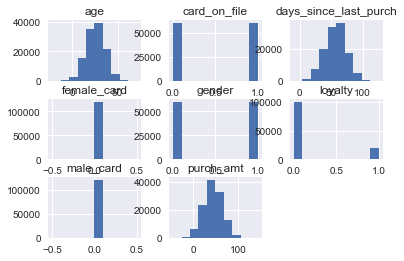

In [69]:
# data exploration:
print('Number of null values in field:\n')
print(customer_data.isnull().sum())

print('Number of each class (ie. member of loyalty program)\n')
print (customer_data['loyalty'].value_counts())

print('Number of each gender\n')
print (customer_data['gender'].value_counts())

print('Card on file?:\n')
print (customer_data['card_on_file'].value_counts())

print('Datatypes:')
print (customer_data.dtypes)

%matplotlib inline
dist = customer_data.hist()



In [132]:
# Descriptive statistics by group.
print(customer_data.groupby('loyalty').describe())

customer_data['neg_age'] = np.where(customer_data['age']<0,1,0)
customer_data['neg_last_purch'] = np.where(customer_data['days_since_last_purch']<0,1,0)
customer_data['neg_purch_amt'] = np.where(customer_data['purch_amt']<0,1,0)
print(customer_data['neg_age'].sum())
print(customer_data['neg_last_purch'].sum())
print(customer_data['neg_purch_amt'].sum())
print(customer_data.groupby('loyalty').median())

                        age  card_on_file  days_since_last_purch  \
loyalty                                                            
0       count  97534.000000  97534.000000           97534.000000   
        mean      25.180347      0.500338              59.961419   
        std        9.730714      0.500002              14.968489   
        min        1.000000      0.000000               3.000000   
        25%       18.000000      0.000000              50.000000   
        50%       25.000000      1.000000              60.000000   
        75%       32.000000      1.000000              70.000000   
        max       70.000000      1.000000             125.000000   
1       count  19859.000000  19859.000000           19859.000000   
        mean      29.968679      0.499924              39.864595   
        std        9.927146      0.500013              12.489409   
        min        1.000000      0.000000               1.000000   
        25%       23.000000      0.000000       

In [95]:
# drop rows with  negative values for purchase amount, age, date of last purchase
customer_data = customer_data[customer_data['purch_amt'] > 0]  
customer_data = customer_data[customer_data['age'] > 0]  
customer_data = customer_data[customer_data['days_since_last_purch'] > 0]  


customer_data = customer_data.drop(['neg_age','neg_last_purch','neg_purch_amt'],axis=1)
print(customer_data.groupby('loyalty').describe())


                        age  card_on_file  days_since_last_purch  \
loyalty                                                            
0       count  97534.000000  97534.000000           97534.000000   
        mean      25.180347      0.500338              59.961419   
        std        9.730714      0.500002              14.968489   
        min        1.000000      0.000000               3.000000   
        25%       18.000000      0.000000              50.000000   
        50%       25.000000      1.000000              60.000000   
        75%       32.000000      1.000000              70.000000   
        max       70.000000      1.000000             125.000000   
1       count  19859.000000  19859.000000           19859.000000   
        mean      29.968679      0.499924              39.864595   
        std        9.927146      0.500013              12.489409   
        min        1.000000      0.000000               1.000000   
        25%       23.000000      0.000000       

In [114]:
# continuous variable
df_cont = customer_data.filter(['days_since_last_purch','purch_amt','age','loyalty'],axis=1)
print(df_cont.groupby('loyalty').describe())



# Test whether group differences are significant.
for col in df_cont.loc[:,'days_since_last_purch':'age'].columns:
    print(col)
    print(stats.ttest_ind(
        df_cont[customer_data['loyalty'] == 0][col],
        df_cont[customer_data['loyalty'] == 1][col]))

                        age  days_since_last_purch     purch_amt
loyalty                                                         
0       count  97534.000000           97534.000000  97534.000000
        mean      25.180347              59.961419     42.931621
        std        9.730714              14.968489     19.010588
        min        1.000000               3.000000      0.010000
        25%       18.000000              50.000000     29.450000
        50%       25.000000              60.000000     42.430000
        75%       32.000000              70.000000     55.840000
        max       70.000000             125.000000    125.530000
1       count  19859.000000           19859.000000  19859.000000
        mean      29.968679              39.864595     54.192082
        std        9.927146              12.489409     19.724604
        min        1.000000               1.000000      0.140000
        25%       23.000000              31.000000     40.650000
        50%       30.0000

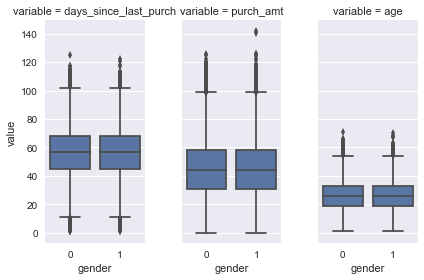

In [128]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_cont
df_long['gender'] = customer_data['gender']
df_long = pd.melt(df_long, id_vars=['gender'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "gender", "value")
plt.show()



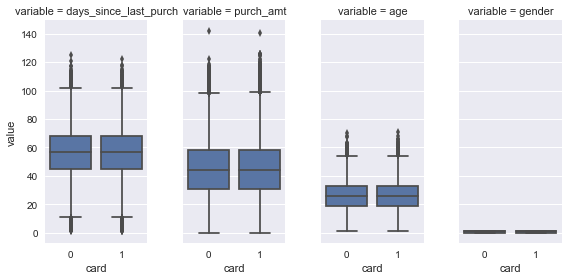

In [130]:
df_long2 = df_cont
df_long2['card'] = customer_data['card_on_file']
df_long2 = pd.melt(df_long2, id_vars=['card'])

g = sns.FacetGrid(df_long2, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "card", "value")
plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3EC63F400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F3EC6D76D8>], dtype=object)

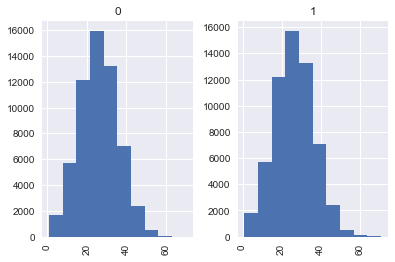

In [152]:
df_cont['age'].hist(by=customer_data['card_on_file'])

In [115]:
customer_data.corr()


,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,female_card,male_card
purch_amt,1.000000,-0.001746,-0.000816,0.039604,-0.098399,0.215459,0.000276,-0.001219
gender,-0.001746,1.000000,-0.003264,0.007590,0.000089,0.002458,-0.579464,0.575656
card_on_file,-0.000816,-0.003264,1.000000,-0.001317,0.001976,-0.000310,0.577208,0.577286
age,0.039604,0.007590,-0.001317,1.000000,-0.084786,0.180820,-0.005935,0.004413
days_since_last_purch,-0.098399,0.000089,0.001976,-0.084786,1.000000,-0.459115,0.001973,0.000309
loyalty,0.215459,0.002458,-0.000310,0.180820,-0.459115,1.000000,-0.002251,0.001893
female_card,0.000276,-0.579464,0.577208,-0.005935,0.001973,-0.002251,1.000000,-0.333572
male_card,-0.001219,0.575656,0.577286,0.004413,0.000309,0.001893,-0.333572,1.000000


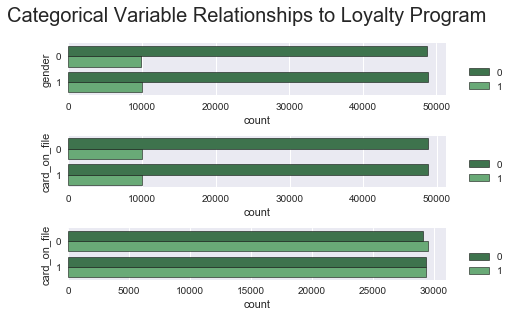

In [116]:
# Plot counts for each combination of levels.
fig, ax = plt.subplots(ncols=1, nrows=3)
plt.suptitle("Categorical Variable Relationships to Loyalty Program", y = 1.09, fontsize=20)

ax1 = plt.subplot(3,1,1)
sns.countplot(y="gender", hue="loyalty", data=customer_data, palette="Greens_d",edgecolor=(0,0,0),linewidth=.5)
ax1.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)

ax2 = plt.subplot(3,1,2)
sns.countplot(y="card_on_file", hue="loyalty", data=customer_data, palette="Greens_d",edgecolor=(0,0,0),linewidth=.5)
ax2.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
ax3 = plt.subplot(3,1,3)
sns.countplot(y="card_on_file", hue="gender", data=customer_data, palette="Greens_d",edgecolor=(0,0,0),linewidth=.5)
ax3.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)

plt.tight_layout()

In [117]:
customer_data['female_card'] = np.where(np.logical_and(customer_data['gender']==0,customer_data['card_on_file']==1),1,0)
customer_data['male_card'] = np.where(np.logical_and(customer_data['gender']==1,customer_data['card_on_file']==1),1,0)



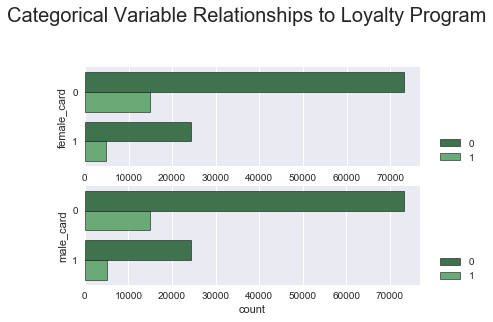

In [118]:
# Plot counts for each combination of levels.
fig, ax = plt.subplots(ncols=1, nrows=2)
plt.suptitle("Categorical Variable Relationships to Loyalty Program", y = 1.09, fontsize=20)

ax1 = plt.subplot(2,1,1)
sns.countplot(y="female_card", hue="loyalty", data=customer_data, palette="Greens_d",edgecolor=(0,0,0),linewidth=.5)
ax1.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)

ax2 = plt.subplot(2,1,2)
sns.countplot(y="male_card", hue="loyalty", data=customer_data, palette="Greens_d",edgecolor=(0,0,0),linewidth=.5)
ax2.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)

In [119]:
customer_data.head(n=20)

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,female_card,male_card
0,19.58,1,0,31.0,35.0,0,0,0
1,65.16,1,1,23.0,61.0,0,0,1
2,40.60,0,0,36.0,49.0,0,0,0
3,38.01,1,1,47.0,57.0,0,0,1
4,22.32,0,1,5.0,39.0,0,1,0
5,39.66,0,0,6.0,79.0,0,0,0
6,43.96,1,1,36.0,64.0,0,0,1
7,6.09,0,1,36.0,67.0,0,1,0
8,25.89,0,0,28.0,53.0,0,0,0
9,93.63,0,0,40.0,47.0,1,0,0


###### Conclusions from Data Exploration
1. No null values
2. Unbalanced dataset - only about 17% participating in loyalty program
3. continuous variables appear normally distributed
4. Approximate equal numbers men versus women, and number that keep card on file
5. Days since last purchase inversely correlated to membership in loyalty program
6. No clear pattern in loyalty based on raw categorical variables

In [120]:
# normalize the data in the combined feature set (without further reducing with pca)
y = df_cont['loyalty']
df_cont = df_cont.drop(['loyalty'],axis=1)

from sklearn import preprocessing

x = df_cont.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features = pd.DataFrame(x_scaled)
features.shape

(117393, 3)

In [122]:
# test and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    y,stratify=y,
                                                    test_size=0.25,
                                                    random_state=0)

In [138]:
all_features = customer_data.drop(['loyalty'], axis=1)
x = all_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
final_features = pd.DataFrame(x_scaled)
final_features.shape


X_train2, X_test2, y_train, y_test = train_test_split(final_features, 
                                                    y,stratify=y,
                                                    test_size=0.25,
                                                    random_state=0)

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation, metrics

lr = LogisticRegression(penalty='l2')

alg = lr.fit(X_train2, y_train)
print('Training set score:', lr.score(X_train2, y_train))
print('Test set score:', lr.score(X_test2, y_test))
predictions = lr.predict(X_test2)
print(pd.crosstab(predictions,y_test))
print('F1 score:', metrics.f1_score(y_test, predictions, labels=None, pos_label=1, average=None, sample_weight=None))

Training set score: 0.867532143019
Test set score: 0.865515009029
loyalty      0     1
row_0               
0        23391  2954
1          993  2011
F1 score: [ 0.92219441  0.50470573]


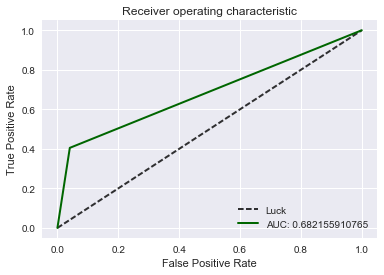

In [140]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Luck', alpha=.8)
label_string = 'AUC: '+ str(roc_auc)
plt.plot(fpr, tpr, lw=2, alpha=1,label=label_string, color='#006600')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()

In [142]:
from sklearn import ensemble
# from sklearn import datasets
# from sklearn.utils import shuffle
# from sklearn.metrics import mean_squared_error

gbm = ensemble.GradientBoostingClassifier(n_estimators=600,learning_rate=0.1, min_samples_split=800,\
                                                               min_samples_leaf=80,max_depth=10,
                                                               max_features='sqrt',\
                                                               subsample=0.8,random_state=10)
print('1')
gbm.fit(X_train2, y_train)
    # predict training set
print('2')
y_pred = gbm.predict(X_train2)
y_pred_test = gbm.predict(X_test2)
    
print('Output:')
print('Accuracy Train: ',metrics.accuracy_score(y_train,y_pred))
print('Accuracy Test: ',metrics.accuracy_score(y_test,y_pred_test))
print('F1 score:', metrics.f1_score(y_test, y_pred_test, labels=None, pos_label=1, average=None, sample_weight=None))


1
2
Output:
Accuracy Train:  0.889180409795
Accuracy Test:  0.858632321374
F1 score: [ 0.91767367  0.5001807 ]


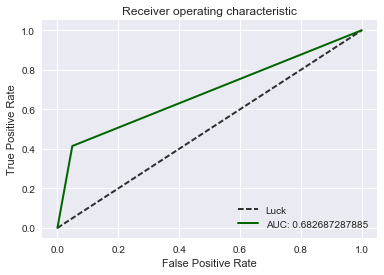

In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Luck', alpha=.8)
label_string = 'AUC: '+ str(roc_auc)
plt.plot(fpr, tpr, lw=2, alpha=1,label=label_string, color='#006600')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()

In [143]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
svm = SVC(kernel = 'linear')
svm.fit(X_train2, y_train)

y_pred = svm.predict(X_train2)
y_pred_test = svm.predict(X_test2)
    
print('Output:')
print('Accuracy Train: ',metrics.accuracy_score(y_train,y_pred))
print('Accuracy Test: ',metrics.accuracy_score(y_test,y_pred_test))
print('F1 score:', metrics.f1_score(y_test, y_pred_test, labels=None, pos_label=1, average=None, sample_weight=None))


Output:
Accuracy Train:  0.865839807369
Accuracy Test:  0.864288391427
F1 score: [ 0.92224803  0.4668719 ]


In [158]:
not_members = customer_data[customer_data['loyalty'] == 0]  
members = customer_data[customer_data['loyalty'] == 1]  
not_members = not_members.sample(20000)
not_members.head()


,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,female_card,male_card,neg_age,neg_last_purch,neg_purch_amt
42288,51.07,0,0,38.0,80.0,0,0,0,0,0,0
69879,50.38,1,1,5.0,51.0,0,0,1,0,0,0
34930,20.93,0,1,38.0,77.0,0,1,0,0,0,0
110978,18.45,1,0,22.0,69.0,0,0,0,0,0,0
78472,46.08,0,0,25.0,72.0,0,0,0,0,0,0


In [159]:
frames = [not_members, members]
result = pd.concat(frames)

In [161]:
result.shape
print (result['loyalty'].value_counts())

0    20000
1    19859
Name: loyalty, dtype: int64


In [163]:
y_sub = result['loyalty']
x_sub = result.drop(['loyalty'],axis =1)

X_train3, X_test3, y_train, y_test = train_test_split(x_sub, 
                                                    y_sub,test_size=0.25,
                                                    random_state=0)

In [164]:
alg = lr.fit(X_train3, y_train)
print('Training set score:', lr.score(X_train3, y_train))
print('Test set score:', lr.score(X_test3, y_test))
predictions = lr.predict(X_test3)
print(pd.crosstab(predictions,y_test))
print('F1 score:', metrics.f1_score(y_test, predictions, labels=None, pos_label=1, average=None, sample_weight=None))

Training set score: 0.797116478223
Test set score: 0.802207727045
loyalty     0     1
row_0              
0        3954   925
1        1046  4040
F1 score: [ 0.80048588  0.80390011]


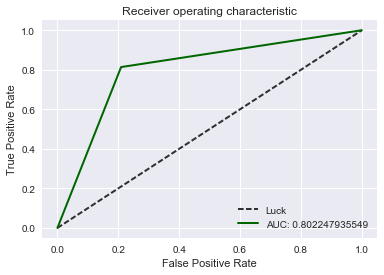

In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Luck', alpha=.8)
label_string = 'AUC: '+ str(roc_auc)
plt.plot(fpr, tpr, lw=2, alpha=1,label=label_string, color='#006600')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()

In [171]:
from sklearn import ensemble
# from sklearn import datasets
# from sklearn.utils import shuffle
# from sklearn.metrics import mean_squared_error

gbm = ensemble.GradientBoostingClassifier()
print('1')
gbm.fit(X_train3, y_train)
    # predict training set
print('2')
y_pred = gbm.predict(X_train3)
y_pred_test = gbm.predict(X_test3)
    
print('Output:')
print('Accuracy Train: ',metrics.accuracy_score(y_train,y_pred))
print('Accuracy Test: ',metrics.accuracy_score(y_test,y_pred_test))
print('F1 score:', metrics.f1_score(y_test, y_pred_test, labels=None, pos_label=1, average=None, sample_weight=None))


1
2
Output:
Accuracy Train:  0.799458085234
Accuracy Test:  0.79859508279
F1 score: [ 0.79404823  0.80294551]


In [168]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
svm = SVC(kernel = 'linear')
svm.fit(X_train3, y_train)

y_pred = svm.predict(X_train3)
y_pred_test = svm.predict(X_test3)
    
print('Output:')
print('Accuracy Train: ',metrics.accuracy_score(y_train,y_pred))
print('Accuracy Test: ',metrics.accuracy_score(y_test,y_pred_test))
print('F1 score:', metrics.f1_score(y_test, y_pred_test, labels=None, pos_label=1, average=None, sample_weight=None))


Output:
Accuracy Train:  0.797317187395
Accuracy Test:  0.800802809834
F1 score: [ 0.79775853  0.8037568 ]


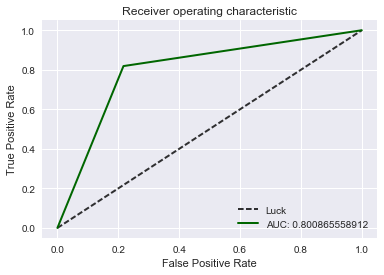

In [170]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
         label='Luck', alpha=.8)
label_string = 'AUC: '+ str(roc_auc)
plt.plot(fpr, tpr, lw=2, alpha=1,label=label_string, color='#006600')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()